In [2]:
import pandas as pd

# Extracting marriage postal survey participant data

In [3]:
df = pd.read_csv('Resources/participant-information.csv')

In [4]:
df.head()

,electoral_division,state,gender,age,age_lower,age_upper,eligible,participant
0,Canberra,Australian Capital Territory Divisions,female,18-19,18,19,"2,433","2,092"
1,Canberra,Australian Capital Territory Divisions,female,20-24,20,24,"6,171","5,084"
2,Canberra,Australian Capital Territory Divisions,female,25-29,25,29,"6,464","5,343"
3,Canberra,Australian Capital Territory Divisions,female,30-34,30,34,"6,359","5,260"
4,Canberra,Australian Capital Territory Divisions,female,35-39,35,39,"6,134","4,990"


# Extracting electorate division data

In [5]:
id_df = pd.read_csv('01-output_electoral_division/electoral_division.csv')
id_df.head()

,division_id,electoral_division,state
0,179,Adelaide,SA
1,197,Aston,VIC
2,198,Ballarat,VIC
3,103,Banks,NSW
4,180,Barker,SA


# Transforming the dataframe to look at age demographics of postal survey

In [6]:
# looking at the column names for marriage postal survey participant database
df.columns

Index(['electoral_division', 'state', 'gender', 'age', 'age_lower',
       'age_upper', 'eligible', 'participant'],
      dtype='object')

In [7]:
# looking at the data types for marriage postal survey participant database
df.dtypes

electoral_division    object
state                 object
gender                object
age                   object
age_lower              int64
age_upper              int64
eligible              object
participant           object
dtype: object

In [8]:
# converting participant column to string then float 
df["participant"] = df["participant"].astype('str')
df["participant"] = df["participant"].str.replace(",","").astype(float)

In [9]:
# checking the data types have changed successfully
df.dtypes

electoral_division     object
state                  object
gender                 object
age                    object
age_lower               int64
age_upper               int64
eligible               object
participant           float64
dtype: object

In [10]:
len(df)

4500

In [11]:
# dropping any na values 
df = df.dropna()
len(df)

4500

In [12]:
# looking at the age groups from the marriage postal survey
print(df["age"].max())
print(df["age"].min())
print(df["age"].unique())

85+
18-19
['18-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-64' '65-69' '70-74' '75-79' '80-84' '85+']


In [13]:
# need to change the age ranges to match the ABS age groups
# create the new bins
bins = [18, 34, 49, 64, 79, 125]

# create labels for these bins, this is the same as ABS age groups, without 0-17 years
group_labels = ["18-34", "35-49", "50-64", "65-79", "80+"]

In [14]:
# place the data series into a new column inside of the DataFrame
df["age_group"]=pd.cut(df["age_upper"], bins, labels=group_labels)
df.head()

,electoral_division,state,gender,age,age_lower,age_upper,eligible,participant,age_group
0,Canberra,Australian Capital Territory Divisions,female,18-19,18,19,"2,433",2092.0,18-34
1,Canberra,Australian Capital Territory Divisions,female,20-24,20,24,"6,171",5084.0,18-34
2,Canberra,Australian Capital Territory Divisions,female,25-29,25,29,"6,464",5343.0,18-34
3,Canberra,Australian Capital Territory Divisions,female,30-34,30,34,"6,359",5260.0,18-34
4,Canberra,Australian Capital Territory Divisions,female,35-39,35,39,"6,134",4990.0,35-49


In [15]:
# grouping by electoral_division and age_group
grouped_df = df.groupby(["electoral_division","age_group"])

In [16]:
# applying aggregate to groupby - sum of participants by new age groups 
participants = grouped_df["participant"].sum()
participants

electoral_division  age_group
Adelaide            18-34        24474.0
                    35-49        20770.0
                    50-64        22353.0
                    65-79        15429.0
                    80+           5396.0
                                  ...   
Wright              18-34        17881.0
                    35-49        21457.0
                    50-64        23840.0
                    65-79        16050.0
                    80+           3317.0
Name: participant, Length: 750, dtype: float64

In [17]:
# creating a pandas dataframe with aggregated eligible data as a column
participants_age = pd.DataFrame({
    "number_participants" : participants
})
participants_age

number_participants
electoral_division age_group                     
Adelaide           18-34                  24474.0
                   35-49                  20770.0
                   50-64                  22353.0
                   65-79                  15429.0
                   80+                     5396.0
...                                           ...
Wright             18-34                  17881.0
                   35-49                  21457.0
                   50-64                  23840.0
                   65-79                  16050.0
                   80+                     3317.0

[750 rows x 1 columns]

In [18]:
# making age_group a column
participants_age = participants_age.reset_index(level=['age_group'])
participants_age.head()

,age_group,number_participants
electoral_division,,
Adelaide,18-34,24474.0
Adelaide,35-49,20770.0
Adelaide,50-64,22353.0
Adelaide,65-79,15429.0
Adelaide,80+,5396.0


In [19]:
# making electoral_division a column
participants_age = participants_age.reset_index(level=['electoral_division'])
participants_age.head()

,electoral_division,age_group,number_participants
0,Adelaide,18-34,24474.0
1,Adelaide,35-49,20770.0
2,Adelaide,50-64,22353.0
3,Adelaide,65-79,15429.0
4,Adelaide,80+,5396.0


In [20]:
# unstacking the age_groups so they become columns
participants_age = participants_age.set_index(["age_group", "electoral_division"]).unstack(level=0)
participants_age.head()

number_participants                                   
age_group                        18-34    35-49    50-64    65-79     80+
electoral_division                                                       
Adelaide                       24474.0  20770.0  22353.0  15429.0  5396.0
Aston                          20745.0  18667.0  21236.0  13420.0  3638.0
Ballarat                       22345.0  22008.0  24709.0  18264.0  5257.0
Banks                          20562.0  20416.0  22008.0  14571.0  6289.0
Barker                         14079.0  16493.0  24109.0  20212.0  6231.0

In [21]:
# looking at the column names
participants_age.columns

MultiIndex([('number_participants', '18-34'),
            ('number_participants', '35-49'),
            ('number_participants', '50-64'),
            ('number_participants', '65-79'),
            ('number_participants',   '80+')],
           names=[None, 'age_group'])

In [22]:
participants_age.index

Index(['Adelaide', 'Aston', 'Ballarat', 'Banks', 'Barker', 'Barton', 'Bass',
       'Batman', 'Bendigo', 'Bennelong',
       ...
       'Wakefield', 'Wannon', 'Warringah', 'Watson', 'Wentworth', 'Werriwa',
       'Whitlam', 'Wide Bay', 'Wills', 'Wright'],
      dtype='object', name='electoral_division', length=150)

In [23]:
# renaming the columns
participants_age.columns = ['ages_18-34', 'ages_35-49', 'ages_50-64', 'ages_65-79', 'ages_80+']
participants_age.head()

,ages_18-34,ages_35-49,ages_50-64,ages_65-79,ages_80+
electoral_division,,,,,
Adelaide,24474.0,20770.0,22353.0,15429.0,5396.0
Aston,20745.0,18667.0,21236.0,13420.0,3638.0
Ballarat,22345.0,22008.0,24709.0,18264.0,5257.0
Banks,20562.0,20416.0,22008.0,14571.0,6289.0
Barker,14079.0,16493.0,24109.0,20212.0,6231.0


In [24]:
# making electoral_division a column instead of index
participants_age = participants_age.reset_index(level=['electoral_division'])
participants_age.columns

Index(['electoral_division', 'ages_18-34', 'ages_35-49', 'ages_50-64',
       'ages_65-79', 'ages_80+'],
      dtype='object')

In [25]:
# looking at the length of the dataframe before merging with division id
len(participants_age)

150

In [26]:
# merging with id_df dataframe
combined_df = pd.merge(participants_age, id_df, how="outer", on="electoral_division")
combined_df.head()

,electoral_division,ages_18-34,ages_35-49,ages_50-64,ages_65-79,ages_80+,division_id,state
0,Adelaide,24474.0,20770.0,22353.0,15429.0,5396.0,179,SA
1,Aston,20745.0,18667.0,21236.0,13420.0,3638.0,197,VIC
2,Ballarat,22345.0,22008.0,24709.0,18264.0,5257.0,198,VIC
3,Banks,20562.0,20416.0,22008.0,14571.0,6289.0,103,NSW
4,Barker,14079.0,16493.0,24109.0,20212.0,6231.0,180,SA


In [27]:
len(combined_df)

150

In [28]:
# columns we want to keep, in the order we want to keepn them
columns = ['division_id', 'ages_18-34', 'ages_35-49', 'ages_50-64', 'ages_65-79', 'ages_80+']
combined_df = combined_df[columns]
combined_df.head()

,division_id,ages_18-34,ages_35-49,ages_50-64,ages_65-79,ages_80+
0,179,24474.0,20770.0,22353.0,15429.0,5396.0
1,197,20745.0,18667.0,21236.0,13420.0,3638.0
2,198,22345.0,22008.0,24709.0,18264.0,5257.0
3,103,20562.0,20416.0,22008.0,14571.0,6289.0
4,180,14079.0,16493.0,24109.0,20212.0,6231.0


In [29]:
# are all the division id values unique?
combined_df['division_id'].is_unique

True

In [30]:
# setting the index as division_id
combined_df = combined_df.set_index("division_id")
combined_df.head()

,ages_18-34,ages_35-49,ages_50-64,ages_65-79,ages_80+
division_id,,,,,
179,24474.0,20770.0,22353.0,15429.0,5396.0
197,20745.0,18667.0,21236.0,13420.0,3638.0
198,22345.0,22008.0,24709.0,18264.0,5257.0
103,20562.0,20416.0,22008.0,14571.0,6289.0
180,14079.0,16493.0,24109.0,20212.0,6231.0


# Exploratory data analysis

In [31]:
# summary statistics table
combined_df.describe()

,ages_18-34,ages_35-49,ages_50-64,ages_65-79,ages_80+
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,20992.033333,20629.660000,21890.700000,15800.180000,4849.273333
std,4977.168869,3797.793451,2808.196607,3768.641072,1513.840052
min,9850.000000,10237.000000,10196.000000,4027.000000,510.000000
25%,17770.000000,18675.750000,20103.000000,13303.500000,3762.750000
50%,20752.500000,20371.500000,21910.500000,15228.500000,4956.000000
75%,22913.000000,22380.250000,23670.000000,18294.750000,5818.500000
max,40693.000000,34439.000000,30462.000000,27832.000000,8493.000000


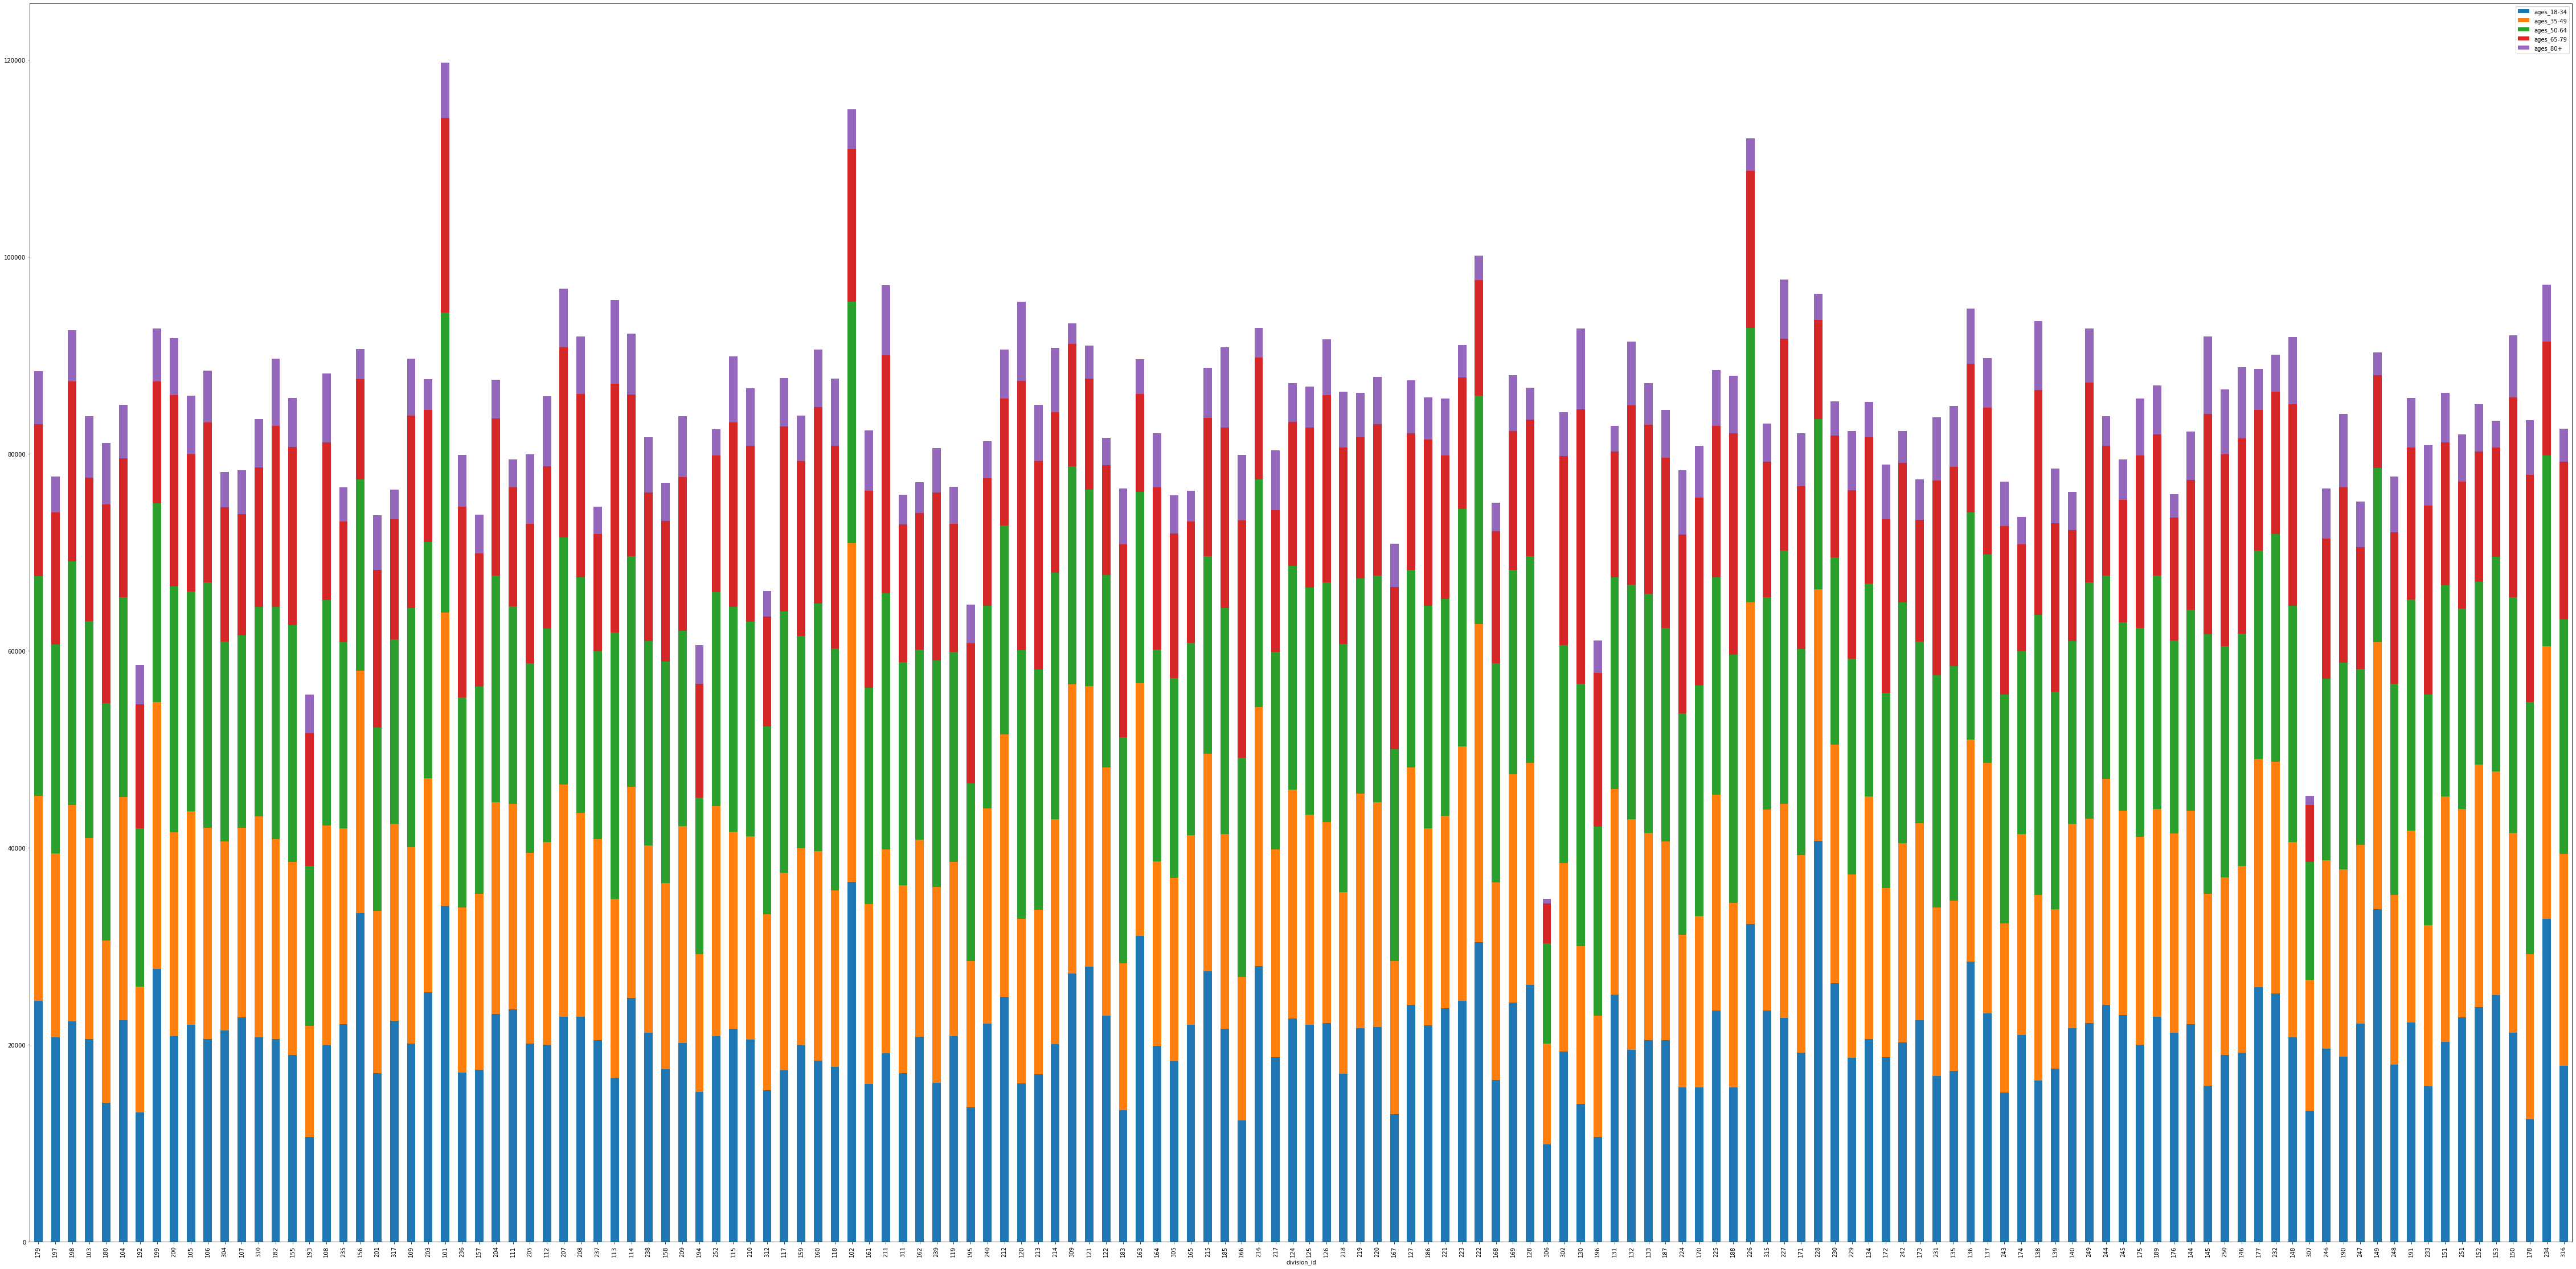

In [32]:
# stacked barchart to compare participants from each age group for each electoral division
combined_df.plot.bar(rot=90, stacked=True, figsize=(80,40))

# Exporting DataFrame to CSV

In [99]:
combined_df.to_csv("07-output_marriage_postal_participants_by_age/marriage_postal_participants_by_age.csv")